# Real Estate- Price Prediction

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [2]:
#Getting dataframe 
df=pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Getting information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
#Describing given data
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Train-Test Spitting

In [5]:
# splitting dataframe acconding to question
train_set,test_set=train_test_split(df,test_size=0.3,random_state=42)

In [6]:
# checking length of test and train set
print(len(train_set))
print(len(test_set))

289
125


## Least Square Regression Model

In [7]:
Y_train=train_set.iloc[:,7]
X_train=train_set.iloc[:,1:-1]

X=X_train
Y=Y_train
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
7,2013.417,20.3,287.60250,6,24.98042,121.54228
194,2013.500,15.2,3771.89500,0,24.93363,121.51158
19,2012.667,1.5,23.38284,7,24.96772,121.54102
176,2012.833,13.9,4573.77900,0,24.94867,121.49507
367,2012.833,15.0,1828.31900,2,24.96464,121.51531


In [8]:
X=X.values
Y=Y.values

In [9]:
b = np.ones((X.shape[0], 1))

In [10]:
X = np.concatenate((b,X), axis=1)
print(X)

[[1.0000000e+00 2.0134170e+03 2.0300000e+01 ... 6.0000000e+00
  2.4980420e+01 1.2154228e+02]
 [1.0000000e+00 2.0135000e+03 1.5200000e+01 ... 0.0000000e+00
  2.4933630e+01 1.2151158e+02]
 [1.0000000e+00 2.0126670e+03 1.5000000e+00 ... 7.0000000e+00
  2.4967720e+01 1.2154102e+02]
 ...
 [1.0000000e+00 2.0133330e+03 1.0800000e+01 ... 1.0000000e+00
  2.4974600e+01 1.2153046e+02]
 [1.0000000e+00 2.0128330e+03 4.6000000e+00 ... 6.0000000e+00
  2.4975850e+01 1.2154516e+02]
 [1.0000000e+00 2.0130830e+03 1.1000000e+00 ... 6.0000000e+00
  2.4965710e+01 1.2154089e+02]]


In [11]:
X.shape

(289, 7)

In [12]:
XT=X.transpose()
print(XT)

[[1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0000000e+00]
 [2.0134170e+03 2.0135000e+03 2.0126670e+03 ... 2.0133330e+03
  2.0128330e+03 2.0130830e+03]
 [2.0300000e+01 1.5200000e+01 1.5000000e+00 ... 1.0800000e+01
  4.6000000e+00 1.1000000e+00]
 ...
 [6.0000000e+00 0.0000000e+00 7.0000000e+00 ... 1.0000000e+00
  6.0000000e+00 6.0000000e+00]
 [2.4980420e+01 2.4933630e+01 2.4967720e+01 ... 2.4974600e+01
  2.4975850e+01 2.4965710e+01]
 [1.2154228e+02 1.2151158e+02 1.2154102e+02 ... 1.2153046e+02
  1.2154516e+02 1.2154089e+02]]


In [13]:
print(X.shape)
print(XT.shape)

(289, 7)
(7, 289)


In [14]:
XTX = np.dot(XT, X)
print(XTX)

[[2.89000000e+02 5.81804421e+05 5.04290000e+03 3.08056013e+05
  1.20700000e+03 7.21621034e+03 3.51231842e+04]
 [5.81804421e+05 1.17126779e+09 1.01521977e+07 6.20175440e+08
  2.42988220e+06 1.45274155e+07 7.07087329e+07]
 [5.04290000e+03 1.01521977e+07 1.25443470e+05 5.56655640e+06
  2.12650000e+04 1.25920215e+05 6.12877885e+05]
 [3.08056013e+05 6.20175440e+08 5.56655640e+06 7.77266184e+08
  6.30242071e+05 7.68951055e+06 3.74346705e+07]
 [1.20700000e+03 2.42988220e+06 2.12650000e+04 6.30242071e+05
  7.61300000e+03 3.01429759e+04 1.46696997e+05]
 [7.21621034e+03 1.45274155e+07 1.25920215e+05 7.68951055e+06
  3.01429759e+04 1.80185830e+05 8.77011388e+05]
 [3.51231842e+04 7.07087329e+07 6.12877885e+05 3.74346705e+07
  1.46696997e+05 8.77011388e+05 4.26864389e+06]]


In [15]:
XTX_inv=np.linalg.inv(XTX)
print(XTX_inv)

[[ 8.95347217e+05 -8.14380184e+01 -1.47721554e-01 -6.31943669e-02
  -6.90141877e-01 -1.10943090e+03 -5.78954951e+03]
 [-8.14380225e+01  4.40118081e-02 -5.51672153e-06 -1.85646141e-06
  -8.67504116e-05 -9.75685870e-02 -3.88887342e-02]
 [-1.47721548e-01 -5.51672267e-06  2.70041746e-05 -1.36067699e-08
  -6.66688288e-06 -1.51157008e-03  1.61389263e-03]
 [-6.31943662e-02 -1.85646176e-06 -1.36067696e-08  9.82740455e-09
   9.39108168e-07  2.01238597e-04  5.09264681e-04]
 [-6.90141818e-01 -8.67504193e-05 -6.66688289e-06  9.39108164e-07
   6.37393978e-04 -1.89176794e-02  1.09731425e-02]
 [-1.10943094e+03 -9.75685895e-02 -1.51157007e-03  2.01238601e-04
  -1.89176792e-02  3.35117067e+01  3.85877079e+00]
 [-5.78954943e+03 -3.88887675e-02  1.61389265e-03  5.09264680e-04
   1.09731428e-02  3.85877041e+00  4.74837780e+01]]


In [16]:
Q=np.dot(XTX_inv,XT)
Beta=np.dot(Q,Y)

In [17]:
print(Beta)
print(Beta.shape)

[-1.13507413e+04  5.84779720e+00 -2.42545813e-01 -5.13873377e-03
  1.07449530e+00  2.39096949e+02 -5.22351550e+01]
(7,)


In [18]:
def predict_y(X1, X2,X3,X4,X5,X6):
    return (Beta[0] + (Beta[1]*X1) + (Beta[2]*X2) + (Beta[3]*X3) + (Beta[4]*X4) + (Beta[5]*X5) +(Beta[6]*X6))


In [19]:
Y_test=test_set.iloc[:,-1]
X_test=test_set.iloc[:,1:-1]
X_test.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,2013.167,1.1,193.5845,6,24.96571,121.54089
350,2013.000,13.2,492.2313,5,24.96515,121.53737
373,2013.083,0.0,274.0144,1,24.97480,121.53059
399,2012.917,12.7,170.1289,1,24.97371,121.52984
369,2012.667,20.2,2185.1280,3,24.96322,121.51237


In [20]:
data=X_test.iloc[0]
print(data)

X1 transaction date                       2013.16700
X2 house age                                 1.10000
X3 distance to the nearest MRT station     193.58450
X4 number of convenience stores              6.00000
X5 latitude                                 24.96571
X6 longitude                               121.54089
Name: 358, dtype: float64


In [21]:
Y_pre=predict_y(data[0],data[1],data[2],data[3],data[4],data[5])
print(Y_pre)

47.55430353039719


In [22]:
Y_actual=Y_test.iloc[0]
print(Y_actual)

45.1


Y_pre and Y_actual are similar 

### Dropping some features 

In [23]:
from sklearn.feature_selection import VarianceThreshold

In [24]:
var_thres=VarianceThreshold(threshold=0.001)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.001)

In [25]:
sum(var_thres.get_support())

4

In [26]:
var_thres.get_support()

array([ True,  True,  True,  True, False, False])

In [27]:
X_train.drop(['X6 longitude','X5 latitude'], axis=1,inplace=True)

## Linear Regression

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression();
mse=cross_val_score(lin_regressor,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-87.85110270846977


## Ridge Regression 

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-7,1e-4,1e-2,1,4,10,20,30,40,60,80,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-07, 0.0001, 0.01, 1, 4, 10,
                                   20, 30, 40, 60, 80, 100]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-87.84813336091102


## Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,Y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+04, tolerance: 4.790e+00
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+04, tolerance: 4.455e+00
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+04, tolerance: 4.567e+00
  model = cd_fast.enet_

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-07, 0.0001, 0.01, 1, 4, 10,
                                   20, 30, 40, 60, 80, 100]},
             scoring='neg_mean_squared_error')

In [32]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-87.85110033991346


In [33]:
X_test.drop(['X6 longitude','X5 latitude'], axis=1,inplace=True)

In [34]:
predict_lasso=lasso_regressor.predict(X_test)
predict_ridge=ridge_regressor.predict(X_test)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

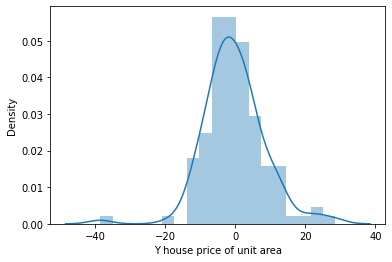

In [35]:
import seaborn as sns
sns.distplot(Y_test-predict_lasso)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

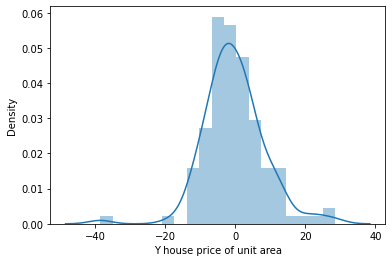

In [36]:
sns.distplot(Y_test-predict_ridge)